## Importando o as bibliotecas e o dataset

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import scikit_learn as sk

# Importando funções auxiliares
import sys
sys.path.append('../')
from src.visualizacao import histogram

# Configurando o ambiente
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use("Solarize_Light2")

In [2]:
# Importando a base de dados
df = pd.read_csv("../data/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


## Dicionário dos dados
Input variables:
*bank client data*
1. age (numeric)

2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 

3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4. education (categorical: "unknown","secondary","primary","tertiary")

5. default: has credit in default? (binary: "yes","no")

6. balance: average yearly balance, in euros (numeric) 

7. housing: has housing loan? (binary: "yes","no")

8. loan: has personal loan? (binary: "yes","no") related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown","telephone","cellular") 

10. day: last contact day of the month (numeric)

11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12. duration: last contact duration, in seconds (numeric)other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15. previous: number of contacts performed before this campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

17. y: has the client subscribed a term deposit? (binary: "yes","no") Output variable (desired target):

## Análisando o dataset

In [3]:
# Dimensões da tabela
linhas_df_original = df.shape[0]
colunas_df_original = df.shape[1]
print(f'Linhas: {linhas_df_original}')
print(f'Colunas: {colunas_df_original}')

Linhas: 41188
Colunas: 21


In [4]:
# Verificando dados nulos
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# Verificando dados duplicados
df.duplicated().sum()

12

In [6]:
# Identificar todas as linhas duplicadas, incluindo a primeira ocorrência
duplicatas = df[df.duplicated(keep=False)]

# Ordena as duplicatas para facilitar a visualização
duplicatas_ordenadas = duplicatas.sort_values(by=df.columns.tolist())

# Observando as duplicatas
duplicatas_ordenadas

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no


In [7]:
# Removendo duplicatas
df.drop_duplicates(inplace=True)

# Verificando dados duplicados novamente
df.duplicated().sum()

0

In [8]:
# Verificando a classificação dos dados
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
# Transformando a variável target em binária
df['y'] = df['y'].map(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts(normalize=True)

y
0   0.89
1   0.11
Name: proportion, dtype: float64

In [10]:
# Convertendo variáveis categóricas para o tipo "category"
categorical_columns = df[['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact','poutcome']].columns
df[categorical_columns] = df[categorical_columns].astype('category')
# Verificando a classificação dos dados novamente
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object

### Análisando as colunas numéricas

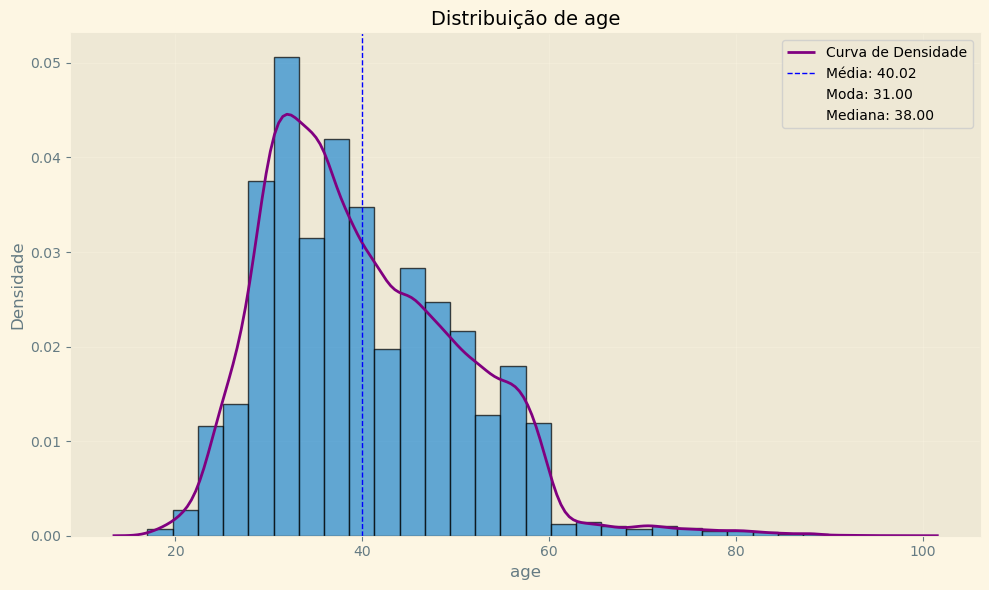

Estatísticas descritivas para age:
  - Máximo: 98
  - Mínimo: 17
  - Média: 40.02
  - Mediana: 38.00
  - Moda: 31.00
  - Variância: 108.59
  - Desvio Padrão: 10.42

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): 0.7845
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): 0.7909
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


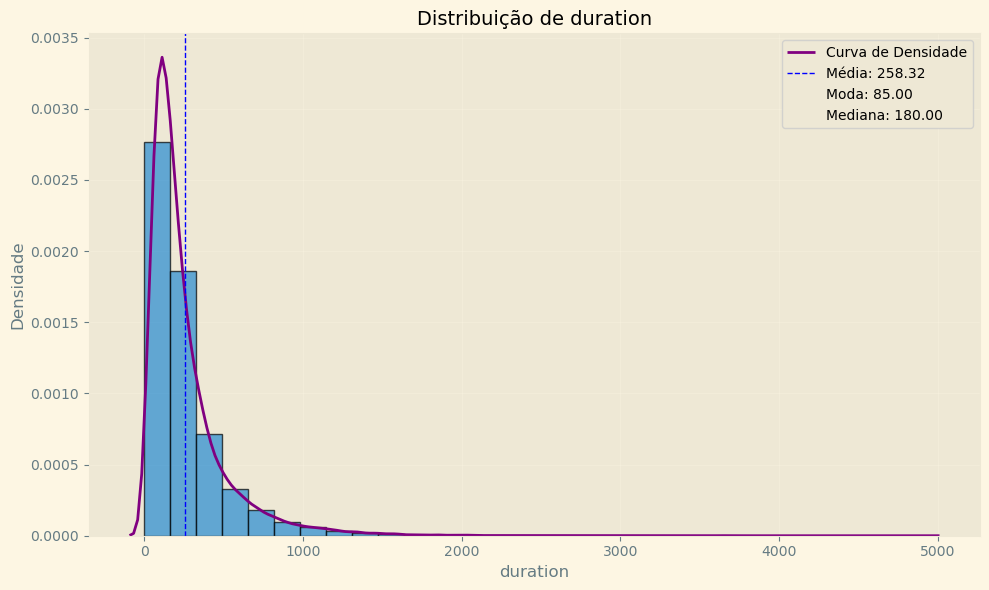

Estatísticas descritivas para duration:
  - Máximo: 4918
  - Mínimo: 0
  - Média: 258.32
  - Mediana: 180.00
  - Moda: 85.00
  - Variância: 67239.25
  - Desvio Padrão: 259.31

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): 3.2627
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): 20.2412
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


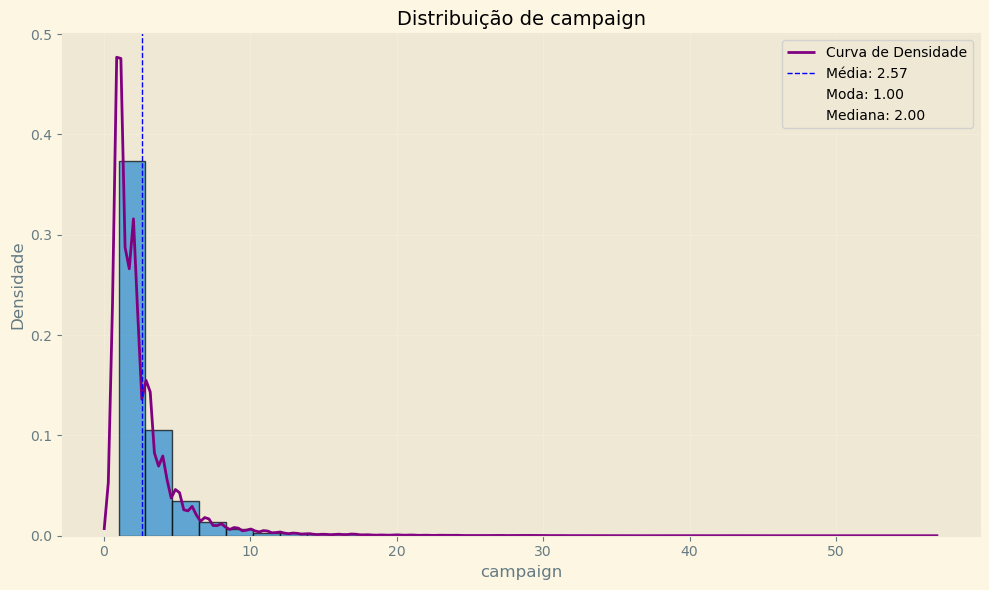

Estatísticas descritivas para campaign:
  - Máximo: 56
  - Mínimo: 1
  - Média: 2.57
  - Mediana: 2.00
  - Moda: 1.00
  - Variância: 7.67
  - Desvio Padrão: 2.77

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): 4.7619
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): 36.9672
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


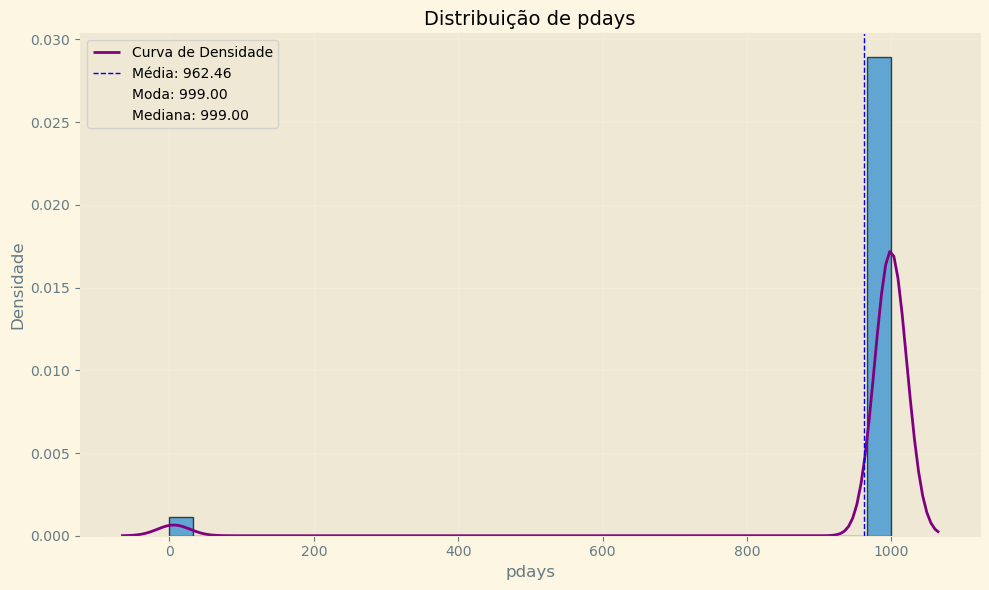

Estatísticas descritivas para pdays:
  - Máximo: 999
  - Mínimo: 0
  - Média: 962.46
  - Mediana: 999.00
  - Moda: 999.00
  - Variância: 34945.48
  - Desvio Padrão: 186.94

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): -4.9212
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): 22.2187
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


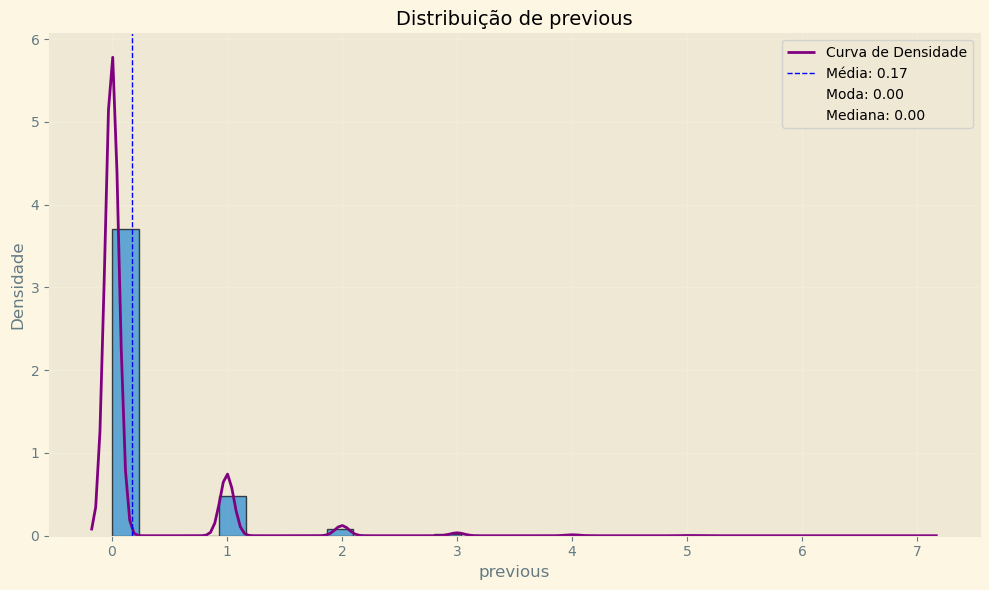

Estatísticas descritivas para previous:
  - Máximo: 7
  - Mínimo: 0
  - Média: 0.17
  - Mediana: 0.00
  - Moda: 0.00
  - Variância: 0.24
  - Desvio Padrão: 0.49

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): 3.8313
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): 20.0996
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


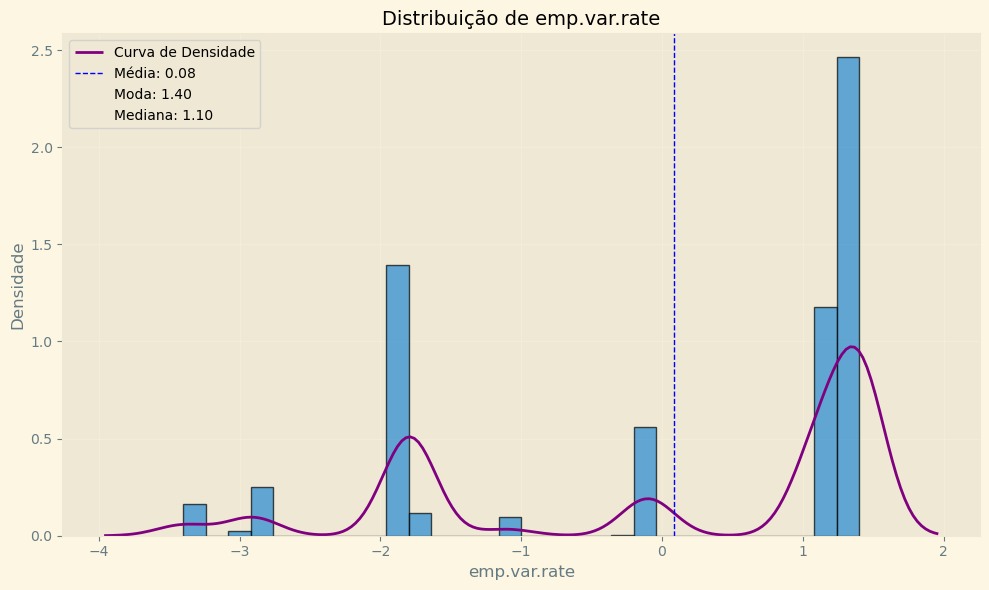

Estatísticas descritivas para emp.var.rate:
  - Máximo: 1.4
  - Mínimo: -3.4
  - Média: 0.08
  - Mediana: 1.10
  - Moda: 1.40
  - Variância: 2.47
  - Desvio Padrão: 1.57

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): -0.7240
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): -1.0627
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


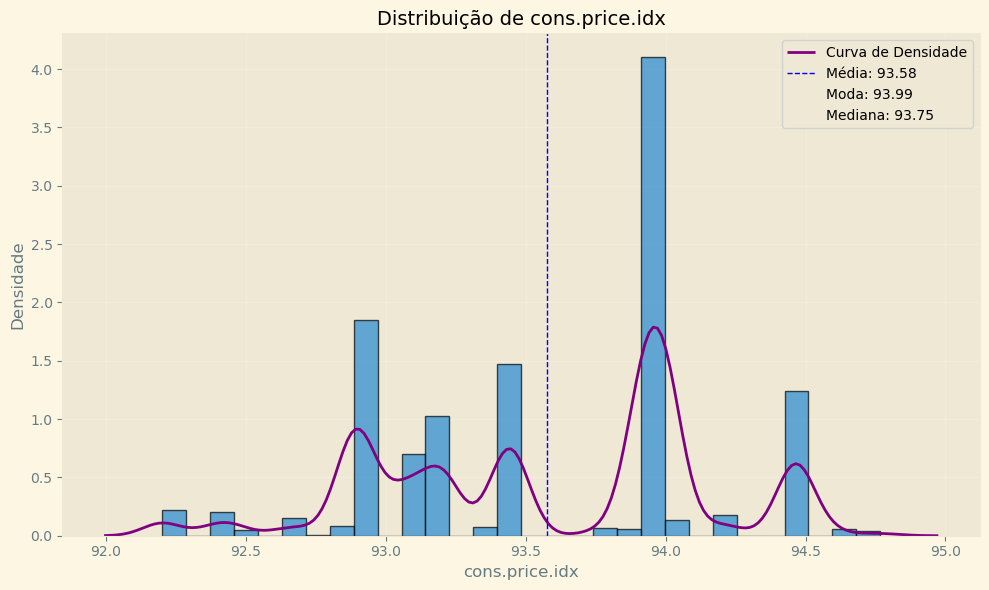

Estatísticas descritivas para cons.price.idx:
  - Máximo: 94.767
  - Mínimo: 92.201
  - Média: 93.58
  - Mediana: 93.75
  - Moda: 93.99
  - Variância: 0.34
  - Desvio Padrão: 0.58

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): -0.2308
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): -0.8299
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


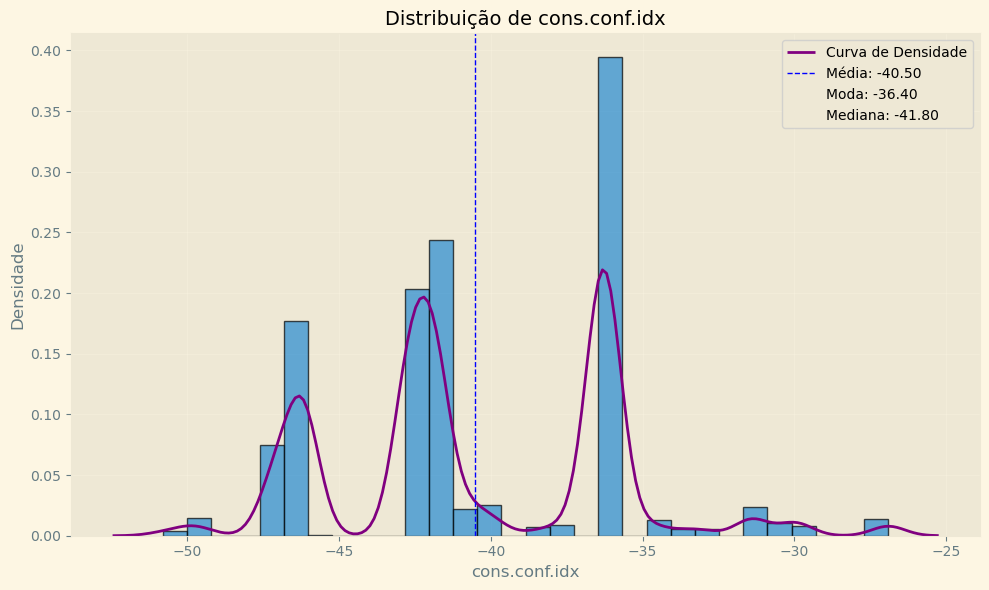

Estatísticas descritivas para cons.conf.idx:
  - Máximo: -26.9
  - Mínimo: -50.8
  - Média: -40.50
  - Mediana: -41.80
  - Moda: -36.40
  - Variância: 21.42
  - Desvio Padrão: 4.63

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): 0.3029
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): -0.3592
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


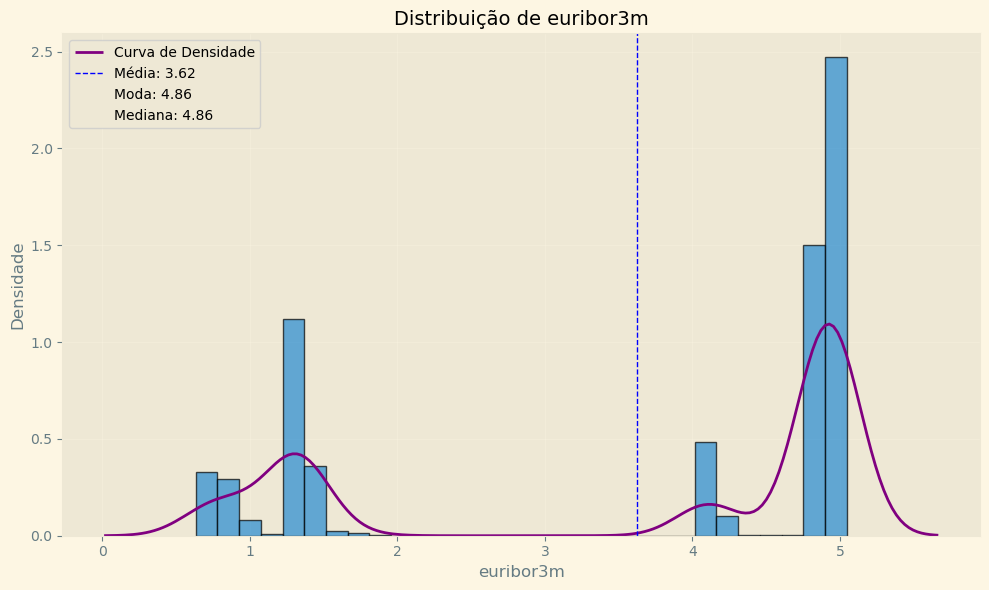

Estatísticas descritivas para euribor3m:
  - Máximo: 5.045
  - Mínimo: 0.634
  - Média: 3.62
  - Mediana: 4.86
  - Moda: 4.86
  - Variância: 3.01
  - Desvio Padrão: 1.73

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): -0.7092
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): -1.4068
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


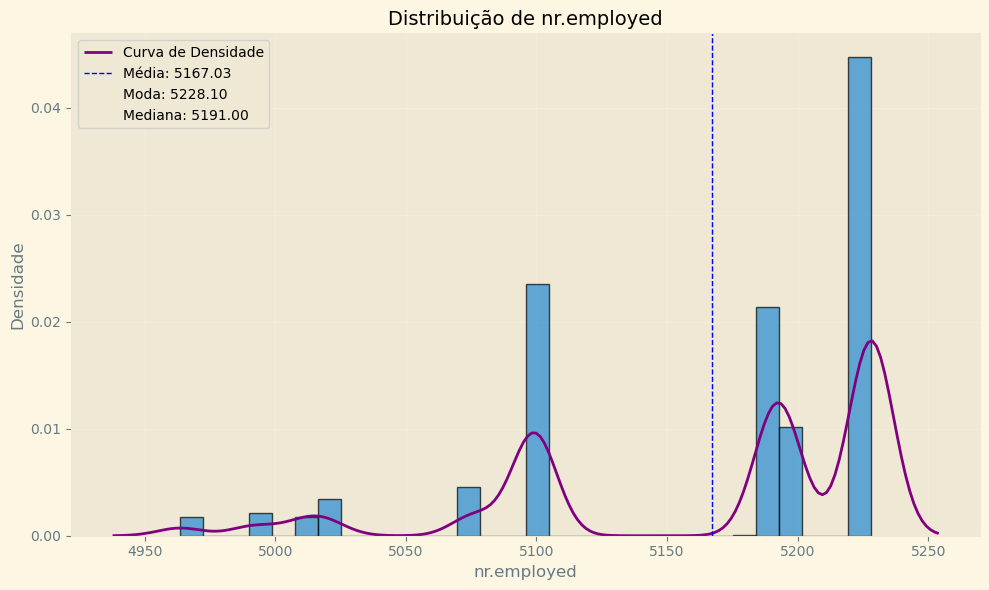

Estatísticas descritivas para nr.employed:
  - Máximo: 5228.1
  - Mínimo: 4963.6
  - Média: 5167.03
  - Mediana: 5191.00
  - Moda: 5228.10
  - Variância: 5220.26
  - Desvio Padrão: 72.25

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): -1.0443
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): -0.0037
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


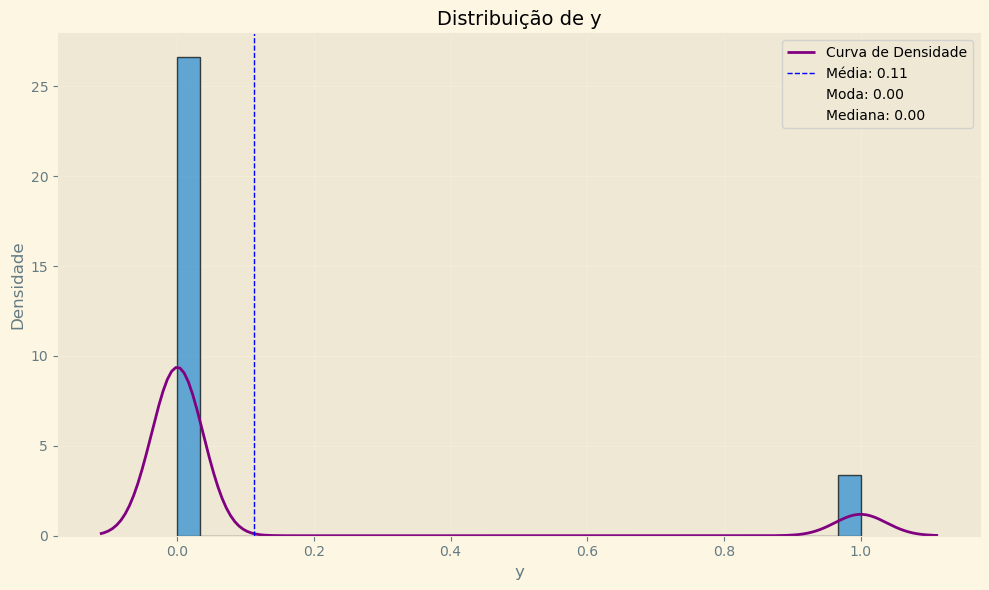

Estatísticas descritivas para y:
  - Máximo: 1
  - Mínimo: 0
  - Média: 0.11
  - Mediana: 0.00
  - Moda: 0.00
  - Variância: 0.10
  - Desvio Padrão: 0.32

Estatísticas adicionais relevantes para normalidade:
Assimetria (Skewness): 2.4501
  - Valores próximos de 0 indicam simetria (característica da normalidade)
  - Valores > 0 indicam assimetria positiva (cauda à direita)
  - Valores < 0 indicam assimetria negativa (cauda à esquerda)
Curtose (Kurtosis): 4.0030
  - Valores próximos de 0 indicam distribuição similar à normal
  - Valores > 0 indicam distribuição mais 'pontiaguda' que a normal
  - Valores < 0 indicam distribuição mais 'achatada' que a normal


In [11]:
# Colunas numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Plotando histogramas para variáveis numéricas
for col in numerical_columns:
    histogram(df, col, bins=30, figsize=(10, 6))

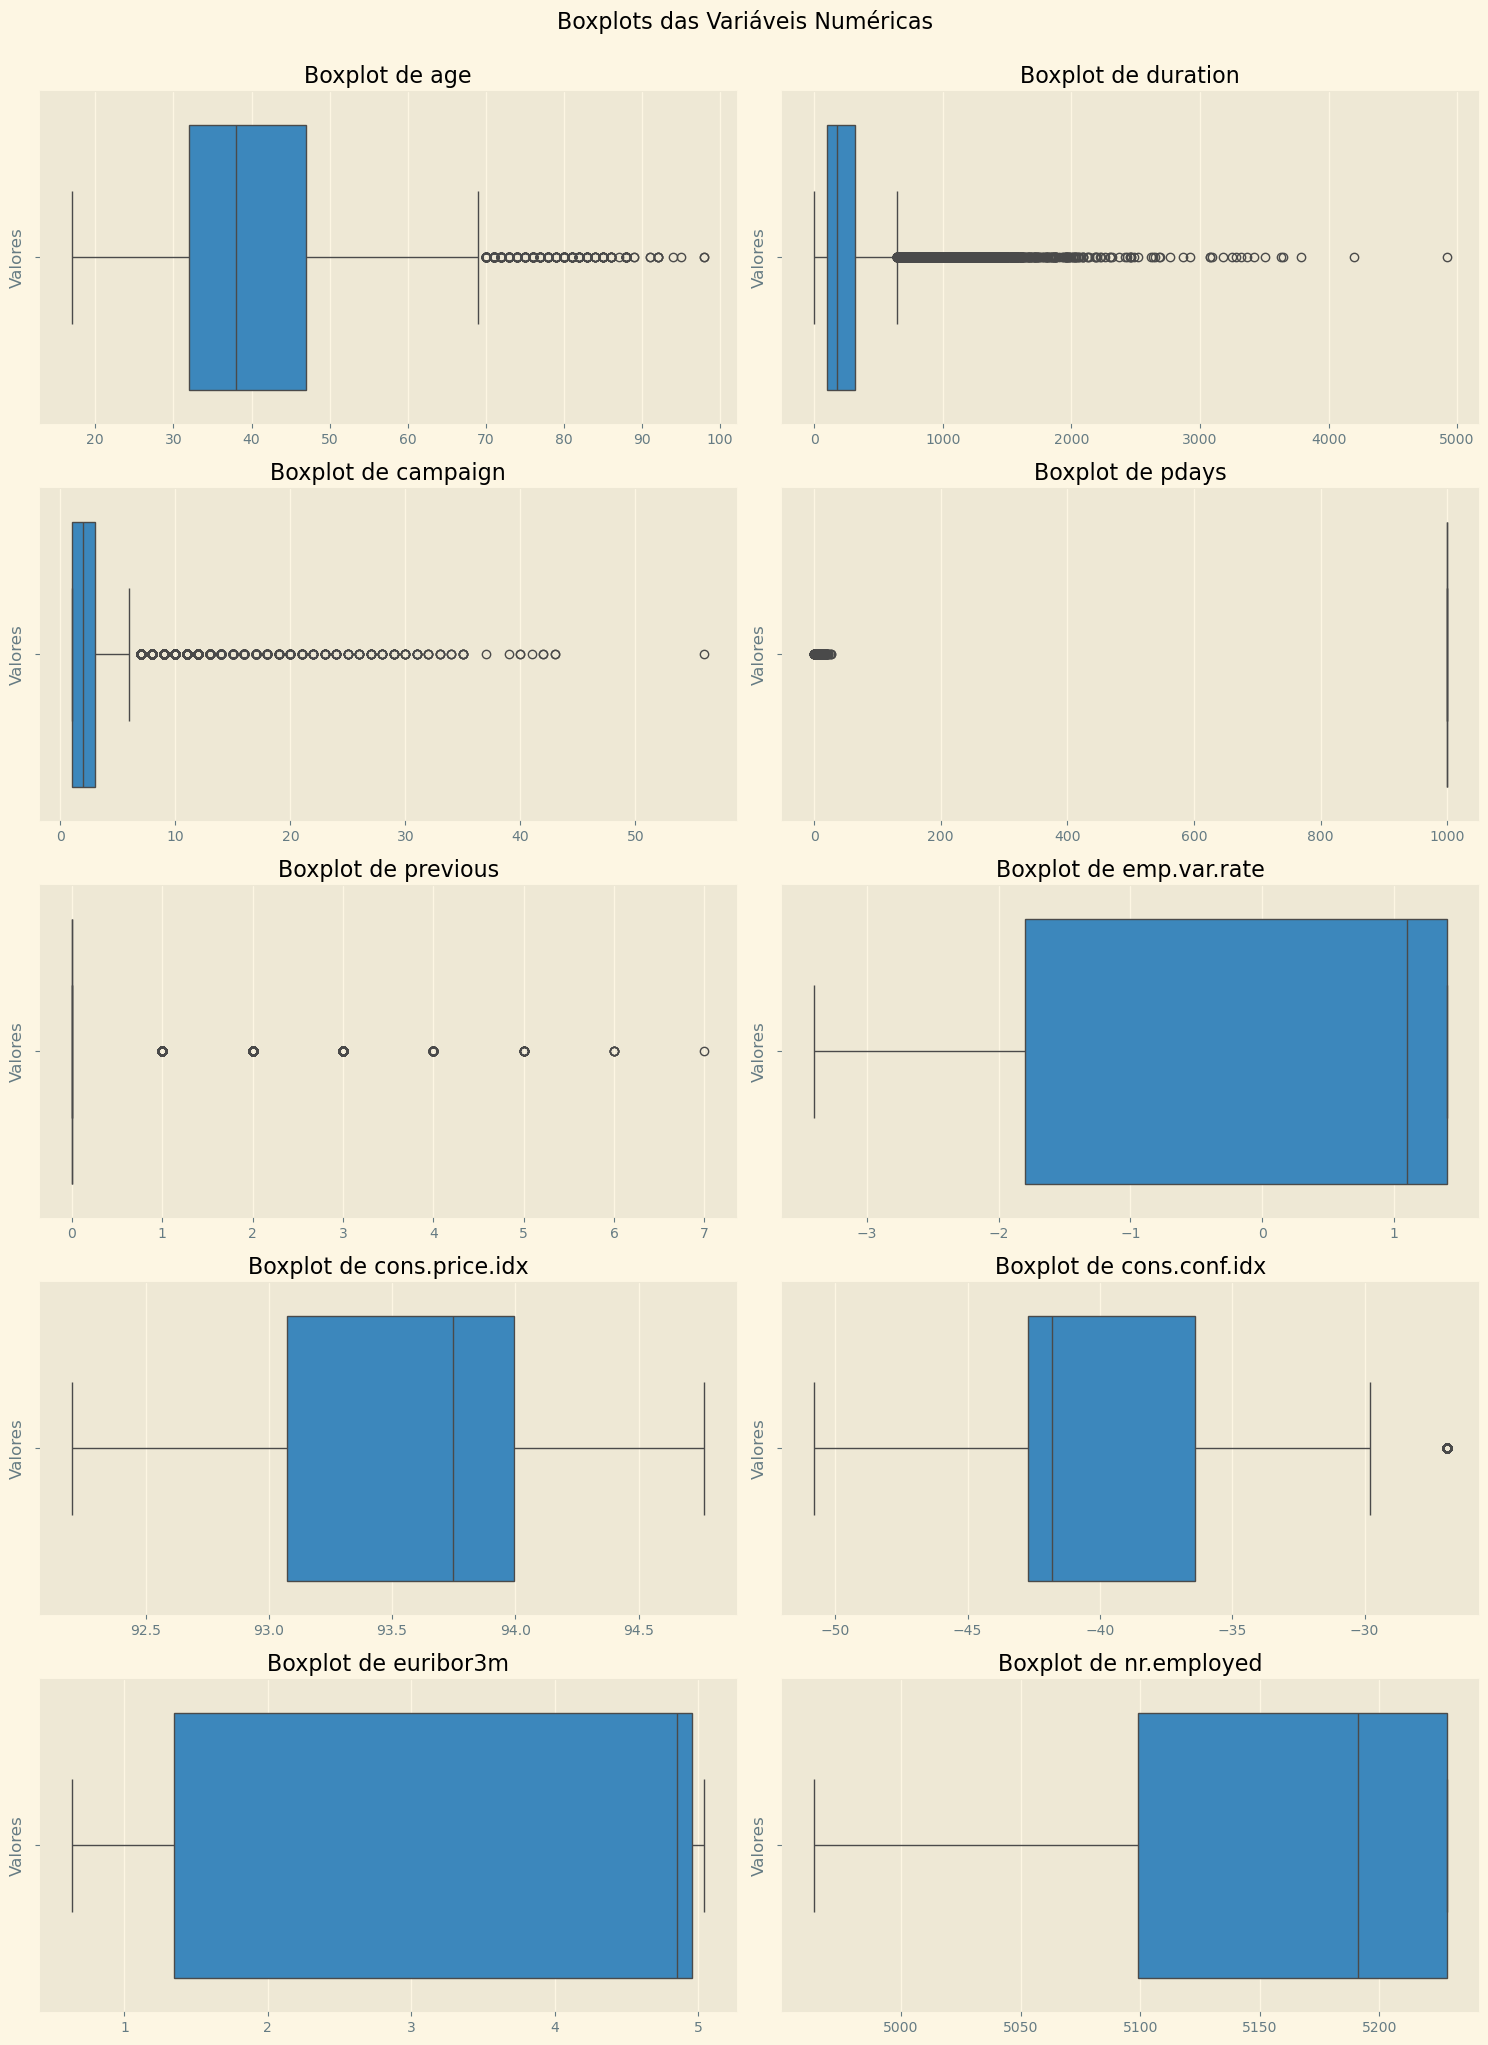

In [12]:
# Criar um subplot grid com 5 linhas e 2 colunas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()  # Transformar o array 2D de eixos em um array 1D para indexação mais fácil

# Plotar cada coluna numérica em seu próprio subplot
for i, col in enumerate(numerical_columns):
    if i < len(axes):  # Garantir que não excedemos o número de subplots
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}', color='black')
        axes[i].set_xlabel('')  # Remover rótulo do eixo x para uma aparência mais limpa
        axes[i].set_ylabel('Valores')  # Adicionar rótulo do eixo y em português

# Caso tenhamos menos colunas numéricas que subplots, esconder os subplots não utilizados
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.suptitle('Boxplots das Variáveis Numéricas', fontsize=16, y=1.02)  # Título geral em português
plt.show()

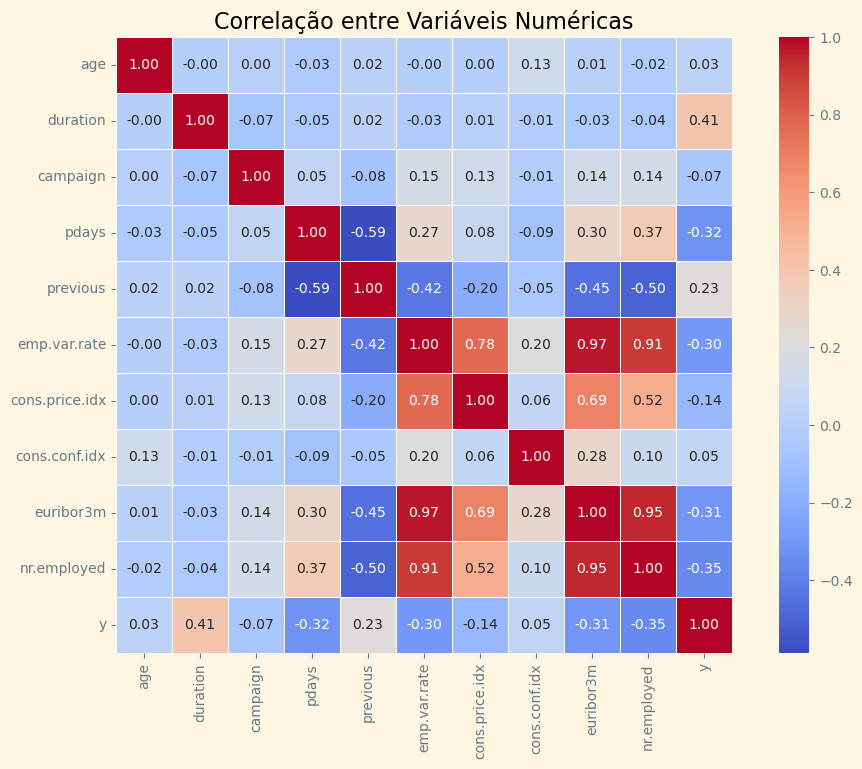

In [13]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlação entre Variáveis Numéricas', fontsize=16, color='black')
plt.show()

### Análisando as colunas categóricas

In [14]:
# Estatísticas descritivas para variáveis categóricas
df.describe(include='category').T

,count,unique,top,freq
job,41176,12,admin.,10419
marital,41176,4,married,24921
education,41176,8,university.degree,12164
default,41176,3,no,32577
housing,41176,3,yes,21571
loan,41176,3,no,33938
contact,41176,2,cellular,26135
poutcome,41176,3,nonexistent,35551


In [15]:
df.select_dtypes(include='category').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

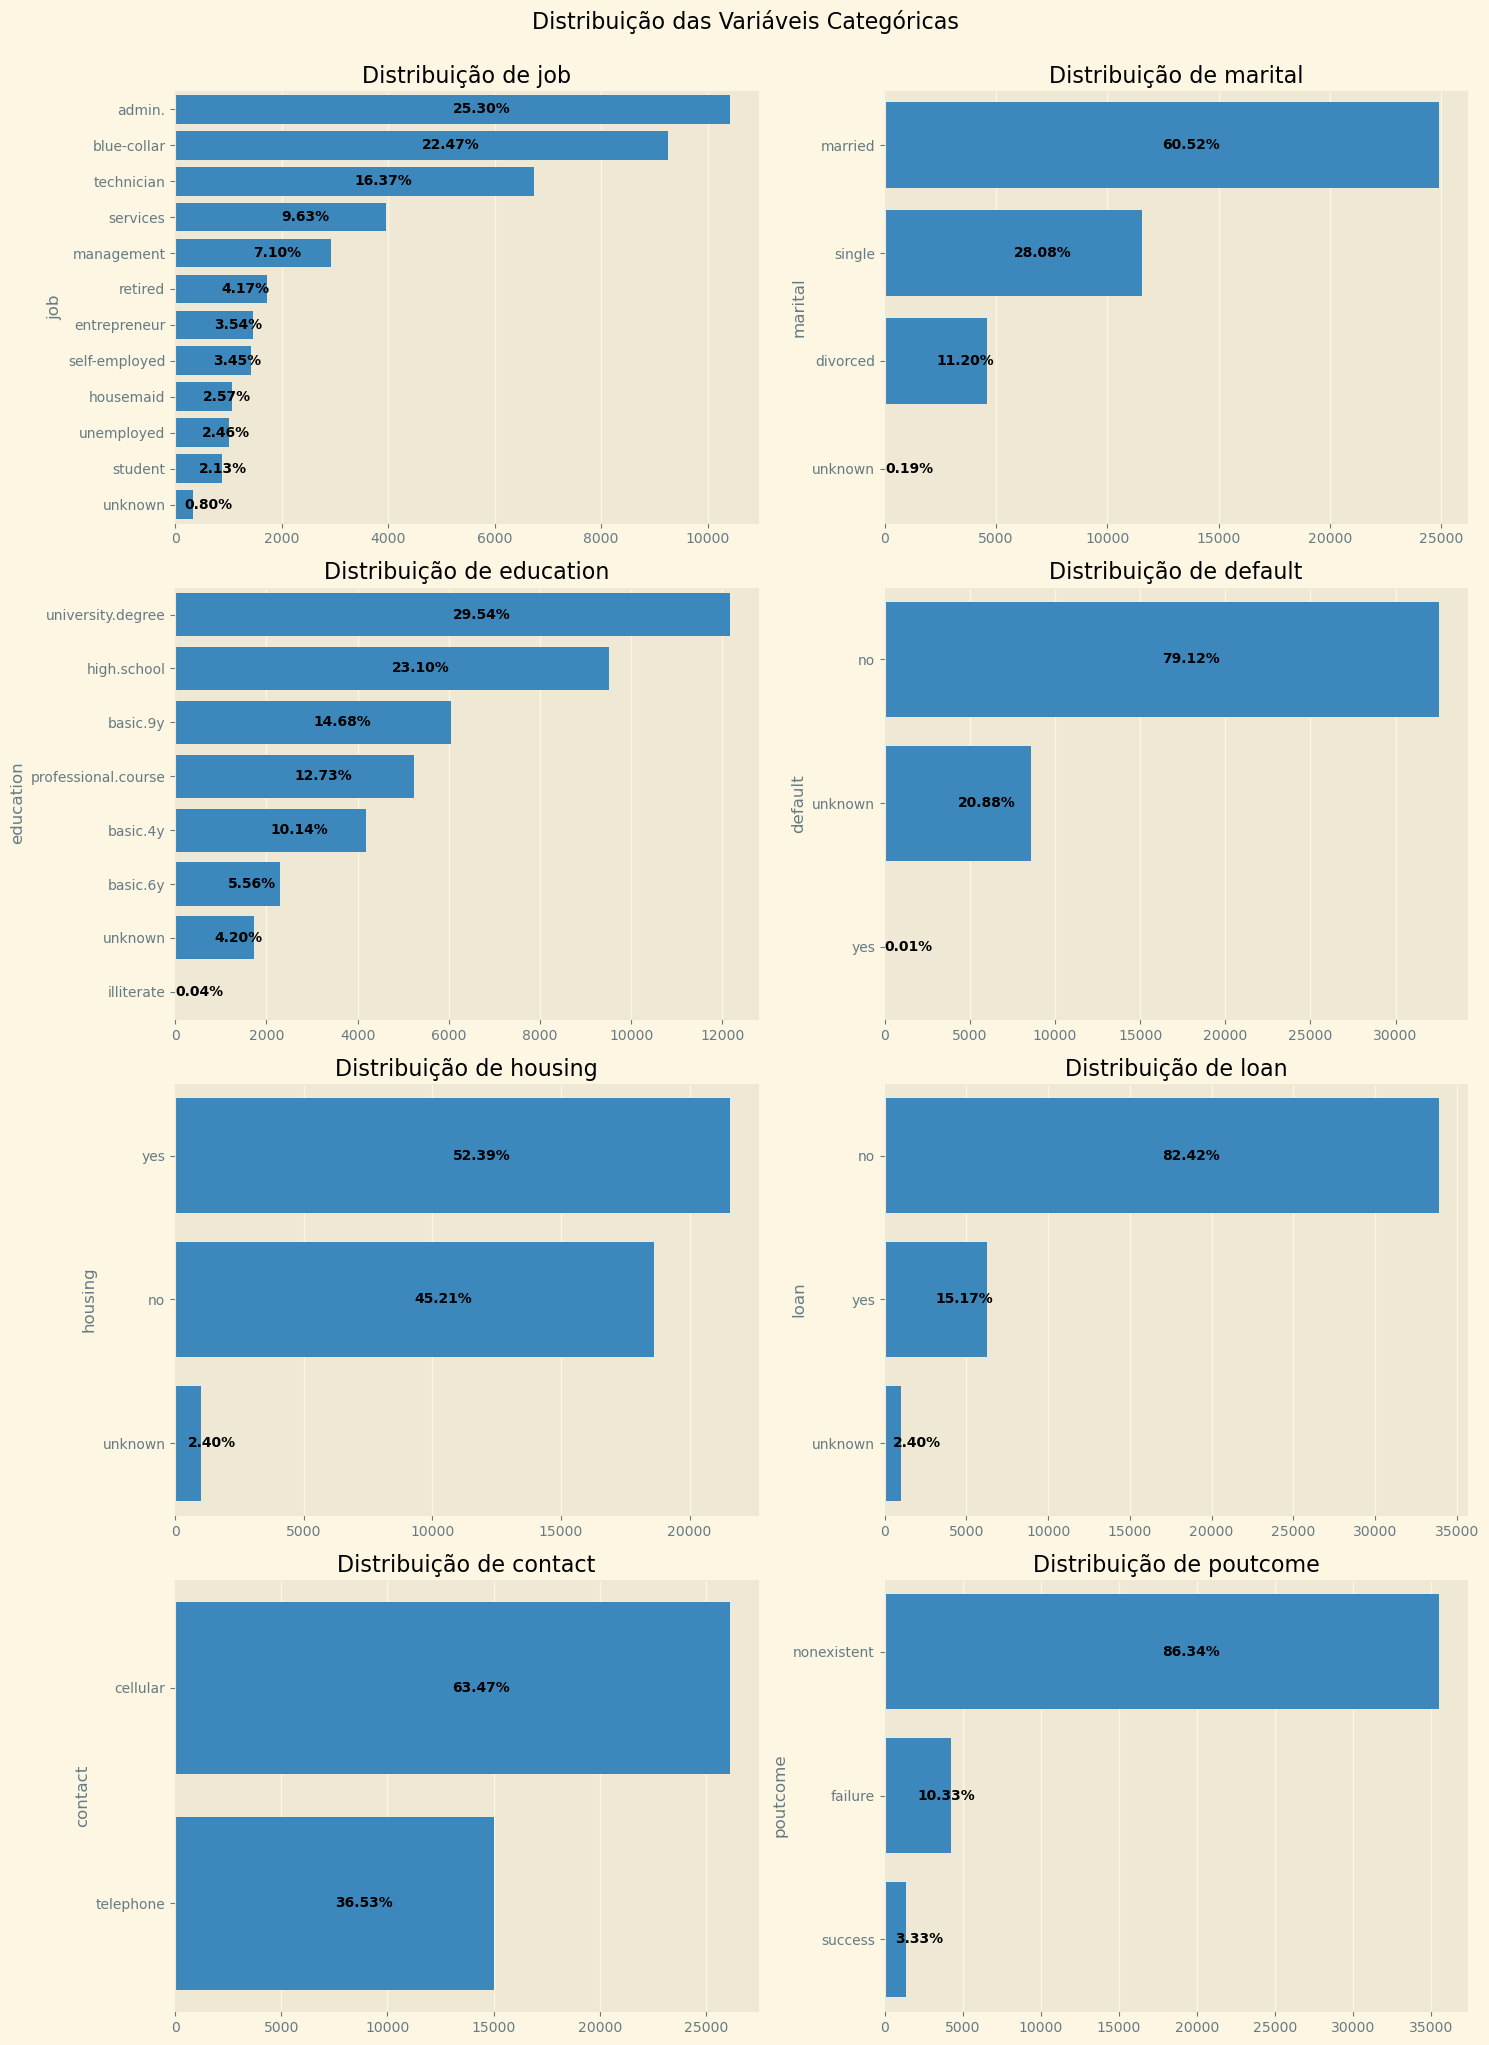

In [16]:
# Criar um subplot grid com 4 linhas e 2 colunas
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

# Plotar cada coluna categórica em seu próprio subplot com rótulos de porcentagem
for i, col in enumerate(categorical_columns):
    if i < len(axes):
        # Calcular contagens e porcentagens
        value_counts = df[col].value_counts()
        total = len(df[col])
        percentages = (value_counts / total) * 100
        
        # Ordenar os valores (opcional)
        order = value_counts.sort_values(ascending=False).index
        
        # Criar o gráfico de contagem
        ax = sns.countplot(df[col], ax=axes[i], order=order)
        
        # Adicionar rótulos de porcentagem dentro das barras
        for j, p in enumerate(ax.patches):
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_x(), p.get_y()
            
            # Calcular a porcentagem correta
            percentage = percentages[order[j]] if isinstance(order, pd.Index) else percentages.iloc[j]
            
            # Posicionar o texto dentro da barra
            ax.annotate(f'{percentage:.2f}%',
                    xy=(x + width/2, y + height/2), 
                    ha='left', va='center',
                    color='black', fontweight='bold')
        
        # Formatar os valores do eixo x para mostrar apenas números inteiros
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
        
        axes[i].set_title(f'Distribuição de {col}', color='black')
        axes[i].set_xlabel('')

# Remover subplots vazios, se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
        
plt.tight_layout()
plt.suptitle('Distribuição das Variáveis Categóricas', fontsize=16, y=1.02)
plt.show()

<Figure size 1400x1200 with 0 Axes>

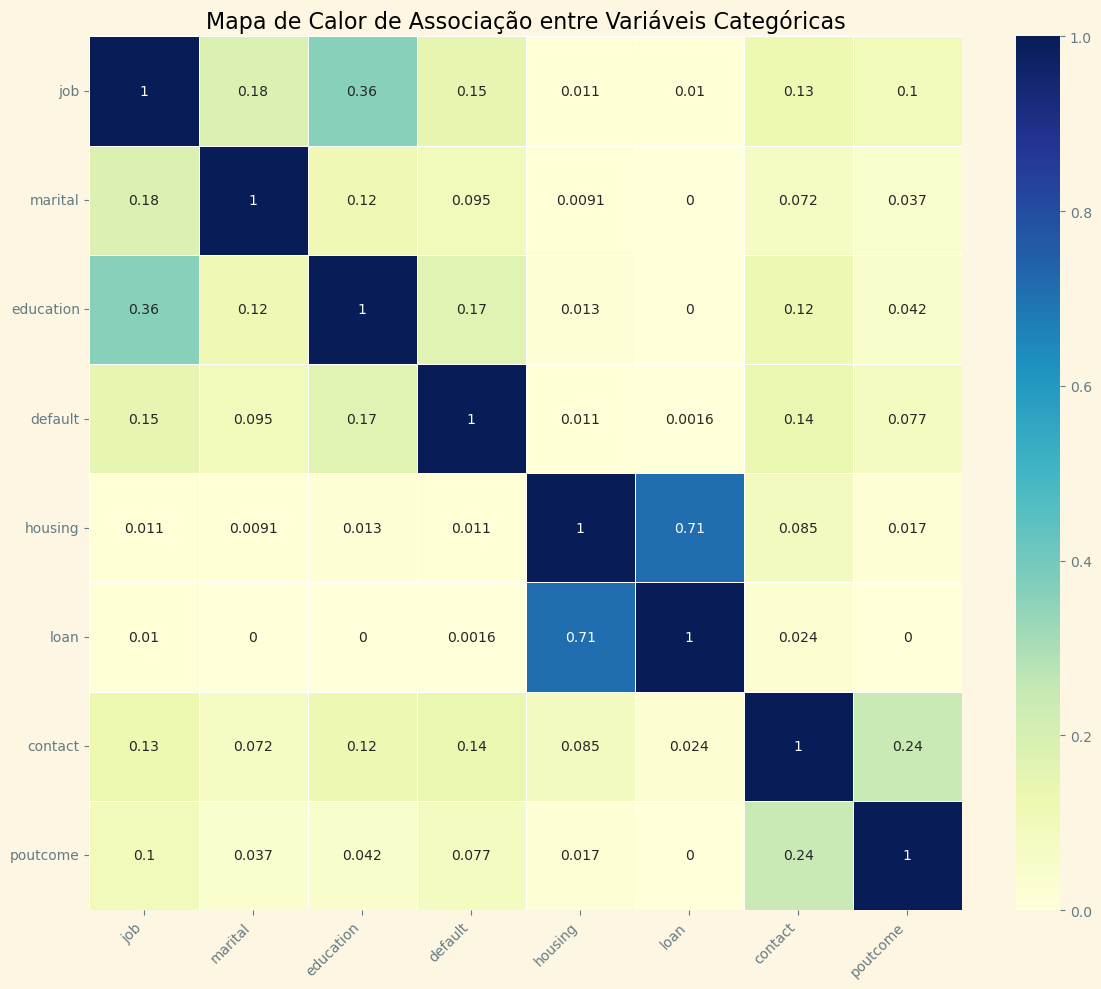

In [17]:
# Criar uma matriz de contingência para cada par de variáveis categóricas
plt.figure(figsize=(14, 12))

# Definir um mapa de cores
cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Criar matriz para armazenar coeficientes de contingência
n_cols = len(categorical_columns)
assoc_matrix = np.zeros((n_cols, n_cols))

# Calcular o coeficiente de Cramer's V para cada par de variáveis
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i == j:
            # Diagonal principal: correlação perfeita (1.0)
            assoc_matrix[i, j] = 1.0
        else:
            # Criar tabela de contingência
            contingency = pd.crosstab(df[col1], df[col2])
            
            # Calcular o qui-quadrado
            chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency)
            
            # Calcular Cramer's V (medida de associação para variáveis categóricas)
            n = contingency.sum().sum()
            phi2 = chi2 / n
            r, k = contingency.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            r_corr = r - (r-1)**2/(n-1)
            k_corr = k - (k-1)**2/(n-1)
            cramer_v = np.sqrt(phi2corr / min(k_corr-1, r_corr-1))
            
            assoc_matrix[i, j] = cramer_v

# Criar o heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    assoc_matrix, 
    annot=True, 
    cmap=cmap, 
    xticklabels=categorical_columns,
    yticklabels=categorical_columns,
    linewidths=0.5
)

plt.title('Mapa de Calor de Associação entre Variáveis Categóricas', fontsize=16, color='black')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()